<a href="https://colab.research.google.com/github/RomanKunal/Machine-Learning/blob/main/LINEARREGIMPLEMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [24]:
import numpy as np

class Linear_Regression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Reshape X to be 2D if it is a 1D array
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        # Reshape X to be 2D if it is a 1D array
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred



In [4]:
from sklearn.model_selection import train_test_split


In [5]:
data=pd.read_csv('/content/salary_data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [28]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [29]:
X.shape

(30, 1)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
model=Linear_Regression(lr=0.02,n_iters=1000)

In [32]:
model.fit(X_train,y_train)

In [33]:
print(model.weights)

[9634.78529191]


In [34]:
print(model.bias)

23935.49212114018


In [35]:
test_pred=model.predict(X_test)

In [36]:
print(test_pred)

[36460.71300062 34533.75594224 67292.02593474 59584.19770121
 92342.4676937  81744.2038726 ]


In [37]:
#visualization
import matplotlib.pyplot as plt


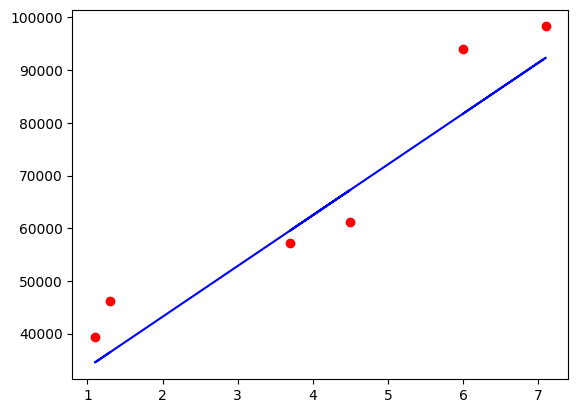

In [38]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,test_pred,color='blue')
plt.show()